<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




<h4>Import the libraries needed</h4>

In [1]:
# Importing python packages required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


<h4> Load data and store in dataframe </h4>

In [2]:
# Load the data from "dvi-a2-ps1-data.csv" file, which is present in the same directory 
# from where this script is executed 
pd.options.display.max_columns= None
%matplotlib inline
warnings.filterwarnings("ignore")

# Importing the provided data set
# Assumption : Dataset should be stored in same directory from where the script is executed
data = pd.read_csv("dvi-a2-ps1-data.csv")
df = data.copy()

In [3]:
# Print first 10 rows of the data so we know what kind of data is present
df.head(2)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [4]:
# Print the data type of all variables
data.dtypes


Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

<p>From the above, we can see that we have mix of categorical and numerical data.</p>

In [5]:
# Describe the Categorial Data Columns
data.describe(include='object').T

,count,unique,top,freq
Name,18207,17194,J. Rodríguez,11
Photo,18207,18207,https://cdn.sofifa.org/players/4/19/158023.png,1
Nationality,18207,164,England,1662
Flag,18207,164,https://cdn.sofifa.org/flags/14.png,1662
Club,17966,651,FC Barcelona,33
Club Logo,18207,679,https://cdn.sofifa.org/teams/2/light/241.png,33
Value,18207,217,€1.1M,431
Wage,18207,144,€1K,4900
Preferred Foot,18159,2,Right,13948
Work Rate,18159,9,Medium/ Medium,9810


In [6]:
# Description the numerical data
data.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


### Question 1
<h4>Fill the missing value for the continous variables with Mean(average) for proper data visualization.
<br><br>
    Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical.
<br><br>    
    Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical.
<h4>Do Univariate anlaysis for outliers detection for height and weight.
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.

In [7]:
# Checking whether we have missing or null values
print("Total number of Missing/Null values in the data set : " , data.isna().sum().sum())

Total number of Missing/Null values in the data set :  76984


In [8]:
# columns that contains null values and need to be cleaned before processing
df.columns[df.isna().any()]

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

#### Preprocess height and weight 

In [9]:
# Transformation: Release Clause, Height and Weight to numerical data

#  convert data in format '€xxM'/'€xxK' to xx Remove
df['Release Clause'] = df['Release Clause'].astype('string')  # force type str
df['Release Clause'] = df['Release Clause'].str.replace("€", '', regex=False)  # . -> ,
df['Release Clause'] = df['Release Clause'].str.replace("M", '', regex=False)  # . -> ,
df['Release Clause'] = df['Release Clause'].str.replace("K", '', regex=False)  # . -> ,
df["Release Clause"] = pd.to_numeric(df["Release Clause"])

# convert data in format xx'xx to xx.xx 
df['Height'] = df['Height'].astype('string')  # force type str
df['Height'] = df['Height'].str.replace("'", '.', regex=False)  # . -> ,
df["Height"] = pd.to_numeric(df["Height"])

# convert data in format xxlbs to xx
df['Weight'] = df['Weight'].astype('string')  # force type str
df['Weight'] = df['Weight'].str.replace("lbs", '', regex=False)  # . -> ,
df["Weight"] = pd.to_numeric(df["Weight"])

# convert data in format '€xxM'/'€xxK' to xx Remove
df['Wage'] = df['Wage'].astype('string')  # force type str
df['Wage'] = df['Wage'].str.replace("€", '', regex=False)  # . -> ,
df['Wage'] = df['Wage'].str.replace("M", '', regex=False)  # . -> ,
df['Wage'] = df['Wage'].str.replace("K", '', regex=False)  # . -> ,
df["Wage"] = pd.to_numeric(df["Wage"])



#### Fill the missing value for the continous variables with Mean(average)

In [10]:
# selecting columns to impute the missing values by mean
to_impute_by_mean_df = df.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']]
    

In [11]:
# replacing the missing values with mean
for attributes in to_impute_by_mean_df.columns:
    df[attributes].fillna(df[attributes].mean(), inplace = True)

#### Fill the missing values for Height and weight with mode

In [12]:
# These are categorical variables and will be imputed by mode
to_impute_by_mode_df = df.loc[:, ['Height','Weight']]
for attributes in to_impute_by_mode_df.columns:
    df[attributes].fillna(df[attributes].mode()[0], inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [14]:
# Checking whether the  dataset contains duplicates
print("Duplicates in the dataset: ", data.duplicated().sum())

Duplicates in the dataset:  0


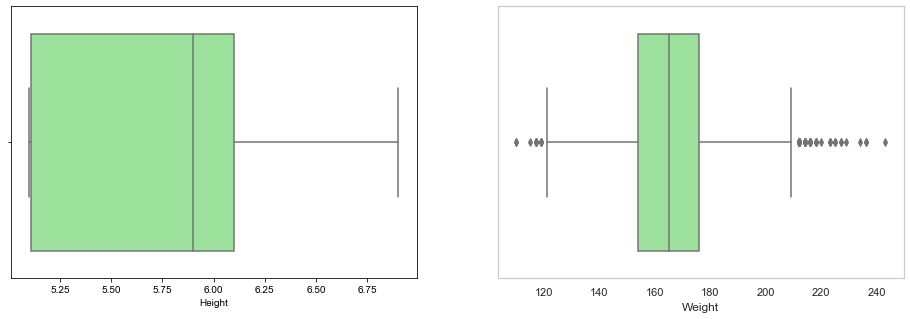

In [15]:
#Univariate anlaysis for outliers detection for height and weight.

# For Height
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
flierprops = dict(markerfacecolor='0.45', markersize=5,
              linestyle='none', color='red')
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Height"], color='lightgreen', flierprops=flierprops)
ax.grid(False)

# For Weight
plt.subplot(1,2,2)
flierprops = dict(markerfacecolor='0.45', markersize=5,
              linestyle='none', color='red')

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Weight"], color='lightgreen', flierprops=flierprops)
ax.grid(False)


<h4>1. Summarise your findings from the visual.</h4>
<p>
    <b>Height:</b> From the visuals, we see that Height has no ouliers <br>
    <b>Weight:</b> From the visuals, we see Weight has many outliers, which can be ignored in forther processing/Model Building
</p>
<h4>2. The reason for selecting the chart type you did.</h4>
   Boxplot is best suited for Univariate analysis, which clearly shows the outliers.   
   <br><br>

### Question 2
<h4>Do Bi-Variate anlaysis for outliers detection for height and weight 
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.

#### Using isolation forest for outlier detection for Bi-Variate analysis

In [16]:
from sklearn.ensemble import IsolationForest
#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df[["Height", "Weight"]])
#extract outliers from the data
df["iso_forest_outliers"] = preds
df["iso_forest_outliers"] = df["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
df["iso_forest_scores"] = isf.decision_function(df[["Height", "Weight"]])
#print how many outliers the data suggests
print(df["iso_forest_outliers"].value_counts())

1     17844
-1      363
Name: iso_forest_outliers, dtype: int64


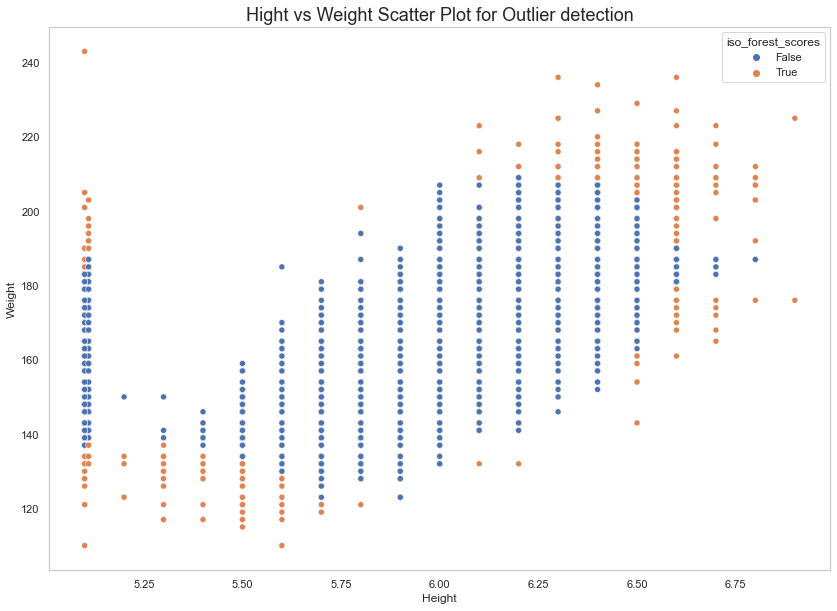

In [17]:
plt.figure(figsize=(14,10))
is_outlier = (df['iso_forest_scores'] < 0)
sns.scatterplot(data=df,x = "Height",y = "Weight", hue=is_outlier)
plt.title("Hight vs Weight Scatter Plot for Outlier detection",fontsize =18)
plt.grid(False)

<h4>1. Summarise your findings from the visual </h4>
<p> Above chart shows the Bi-Variate analysis Hight vs Weight outlier detection. We can observe that there are around 363 outliers in the graph which should be treated </p>

<h4> 2. The reason for selecting the chart type you did. </h4>
<p> We have choosen scatter plot because it is very useful in outlier detection and it is easy to understand and locate outliers  </p>

### Question 3
<h4>What kind of co-relation exists between Age and Overall.
<br><br>    
Write the python code in the below cell to create appropriate visual to perform the above task.

<AxesSubplot:title={'center':'Correlation Matrix between Age and Overall features'}>

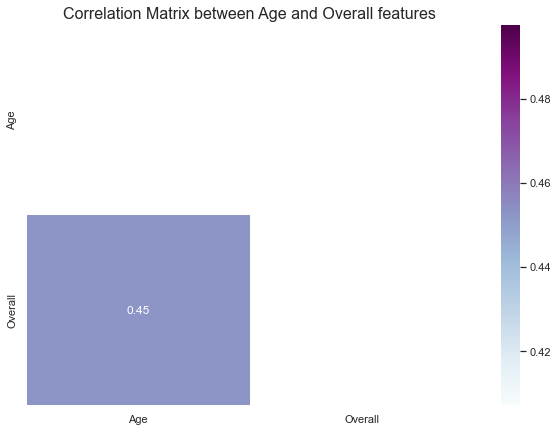

In [18]:
# co-relation between Age and Overall. 
num_columns = ["Age", "Overall"]
plt.figure(figsize=(10,7))
plt.title("Correlation Matrix between Age and Overall features", fontsize=16)
mask = np.triu(np.ones_like(data[num_columns].corr(method ='pearson'), dtype=bool))
sns.heatmap(data[num_columns].corr(method ='pearson'), annot=True, mask=mask, cmap="BuPu")



<h4>1. Summarise your findings from the visual </h4>
<p> Above chart shows that Age and Overall are co-related to some extent. </p>

<h4> 2. The reason for selecting the chart type you did. </h4>
<p> Co-relation marix shows us the visual representation of how the variables are co-related. 
    The higher the co-relation value is, the higher they are related in +ve direction or -ve direction </p>

  ### Question 4
<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.

In [19]:
# Age group function creates the buckets with a pre-defined range
def age_group(data):
    # Ensure data is integers and positive
    data = abs(int(data))
    if( 16 < data < 31 ):
        return "17-30"
    if( 30 < data < 41 ):
        return "31-40"
    if( 40 < data < 51 ):
        return "41-50"
    if( 50 < data < 61 ):
        return "51-60"
    if( 60 < data < 71 ):
        return "61-70"
    else:
        return "Above 70"

In [20]:
# Apply age group
df['age_group'] = df['Age'].apply(age_group)

# Age Buckets
age_list = ['17-30', '31-40', '41-50', '51-60', '61-70', 'Above 70']

Text(0, 0.5, 'Overall/Potential')

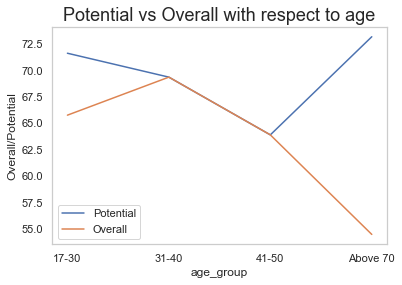

In [21]:
df.groupby('age_group')['Potential','Overall'].mean().plot.line(grid=False)

plt.title("Potential vs Overall with respect to age", fontsize=18)
plt.ylabel("Overall/Potential")


<h4>1. Summarise your findings from the visual </h4>
<p> From the above vizual we can say that as the age increases the Overall decreases and potential increases </p>

<h4> 2. The reason for selecting the chart type you did. </h4>
<p> The reason for selecting a line chart is because it gives a neat and clear vizualization of both the Potential and Overall</p>

  ### Question 5
<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.

In [22]:
df['Vision'].isnull().sum()

0

In [23]:
df['Vision'] = df['Vision'].fillna(df['Vision'].mean())

In [24]:
df['Value'] = df['Value'].str.replace('€', '')
df["Value"] = df["Value"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df['Value']

0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: int64

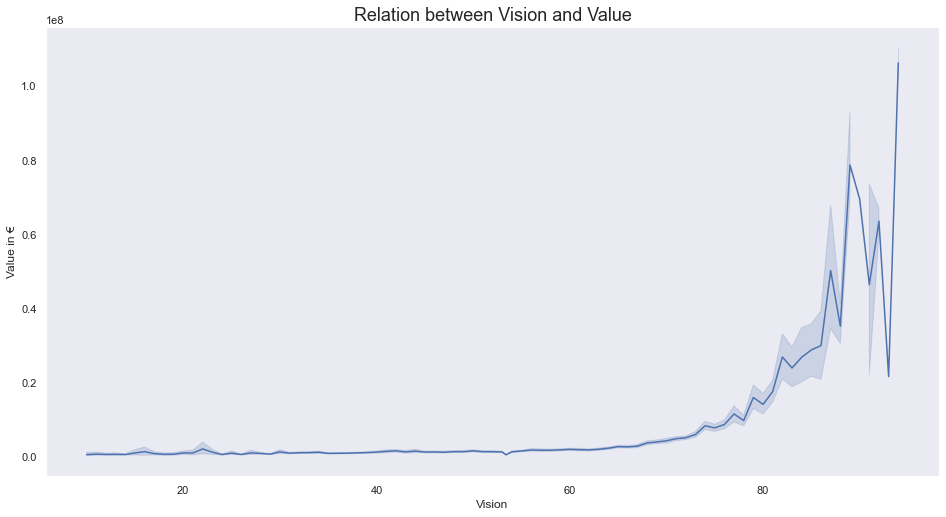

In [25]:
sns.set(rc={'figure.figsize':(16,8.27)})

sns.lineplot(data=df, x="Vision", y="Value")
plt.xlabel("Vision")
plt.ylabel("Value in €")
plt.title("Relation between Vision and Value", fontsize=18)
plt.grid(False)


<h4>1. Summarise your findings from the visual.</h4>
<p>
    From the visual we can see that as the Vision of the player increases, his/her value also increases.
</p>
<h4>2. The reason for selecting the chart type you did.</h4>
    The reason for selecting a line chart is because it gives a neat and clear vizualization of both the Vision and Value

#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question  

### Q1: Which age group Footballers receive the highest amount of wage and how much? 

In [26]:
highest_wage_df = df.groupby('Age')[['Wage']].mean()

In [27]:
def set_custom_palette(df, max_color = 'red', other_color = 'lightgrey'):
    max_val = df.max()
    pal = []
    
    for item in df:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

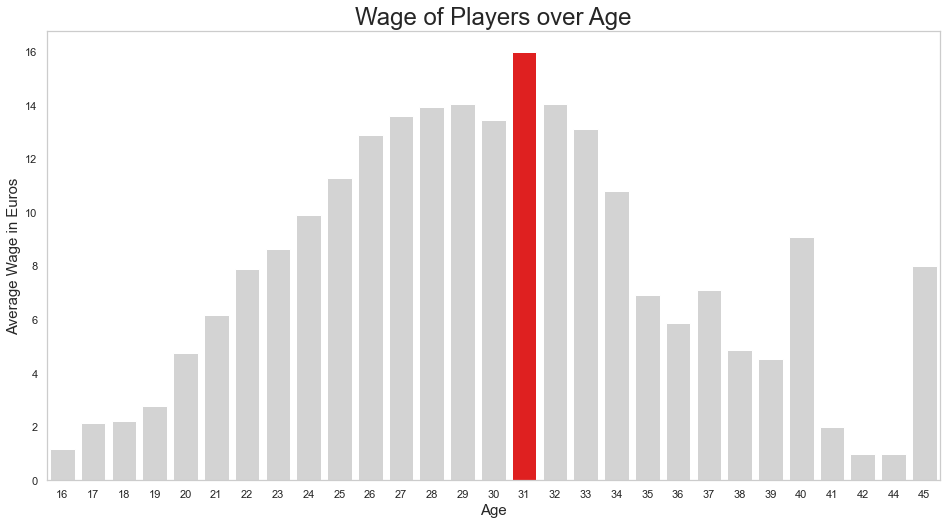

In [28]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = highest_wage_df.index, y = highest_wage_df.Wage, palette = set_custom_palette(highest_wage_df['Wage']));
ax.set_xlabel('Age',fontsize=15)
ax.set_ylabel('Average Wage in Euros',fontsize=15)
plt.title('Wage of Players over Age',fontsize=24);
ax.grid(False)




In [29]:
m = highest_wage_df.max()
wage = m[0]

print('Maximum wage is :', round(wage * 1000), " Euros for the average age group of 31yrs")

Maximum wage is : 15977  Euros for the average age group of 31yrs


<h4> 1. Summarise your findings from the visual </h4>
<p> The visual shows that the average age of players getting highest 'Wage' is 31yrs </p>

<h4> 2. The reason for selecting the chart type you did. </h4>
<p> The reason for selecting bar chart is because we can highlight the bar we are interested in or want the 
   focus of the viewer to be on and it gives clear picture of the wage that players of different age get.
    </p>